In [1]:
## Prepare a classification model using SVM for salary data 


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn .preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
### Importing data set
train=pd.read_csv("C:/Users/Vijay Rathod/Downloads/SalaryData_Train(1).csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test=pd.read_csv("C:/Users/Vijay Rathod/Downloads/SalaryData_Test(1).csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
###Let's Visualize the data for better understanding

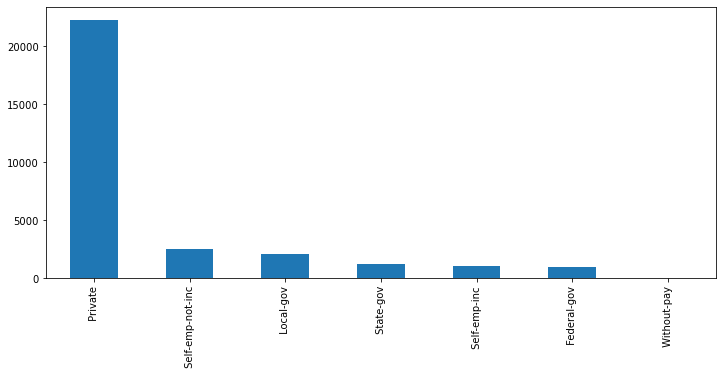

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,5))
train.workclass.value_counts().plot.bar();

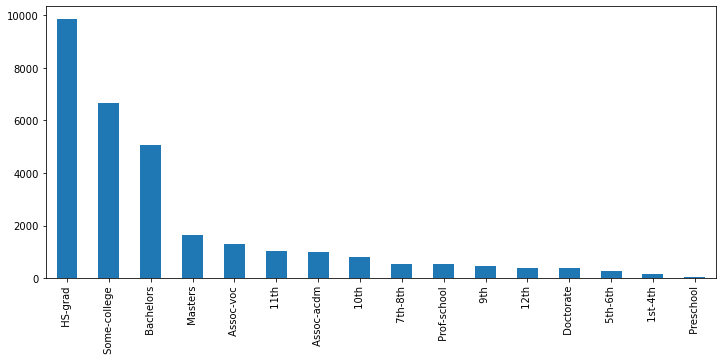

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,5))
train.education.value_counts().plot.bar();

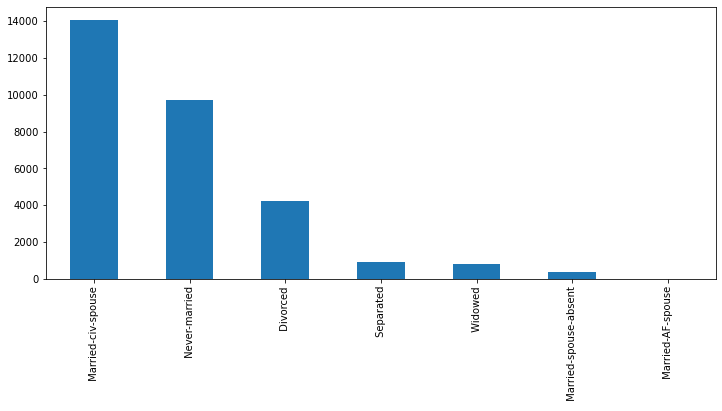

In [8]:
plt.figure(figsize=(12,5))
train.maritalstatus.value_counts().plot.bar();


<AxesSubplot:>

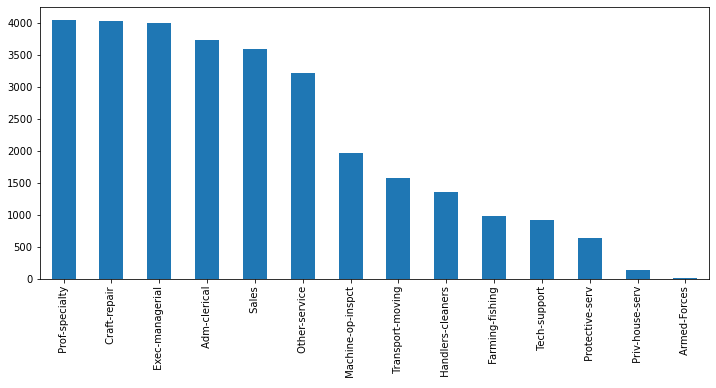

In [9]:
plt.figure(figsize=(12,5))
train.occupation.value_counts().plot.bar()

<AxesSubplot:>

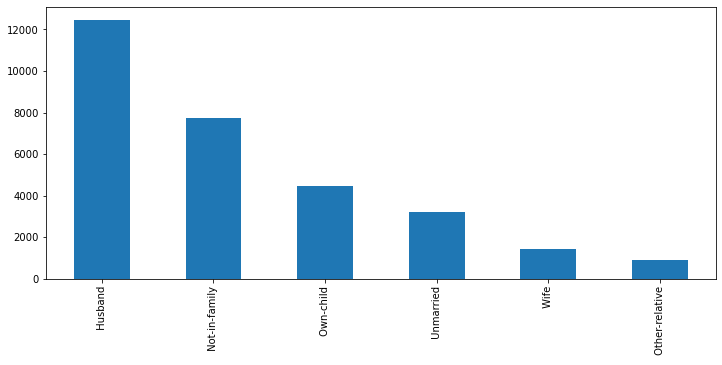

In [10]:
plt.figure(figsize=(12,5))
train.relationship.value_counts().plot.bar()

<AxesSubplot:>

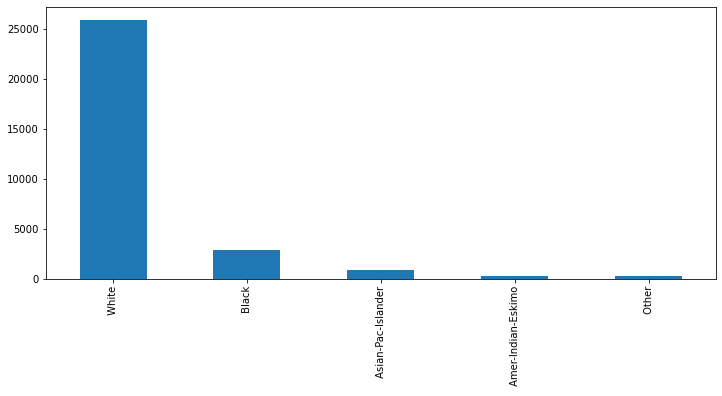

In [11]:
plt.figure(figsize=(12,5))
train.race.value_counts().plot.bar()

<AxesSubplot:>

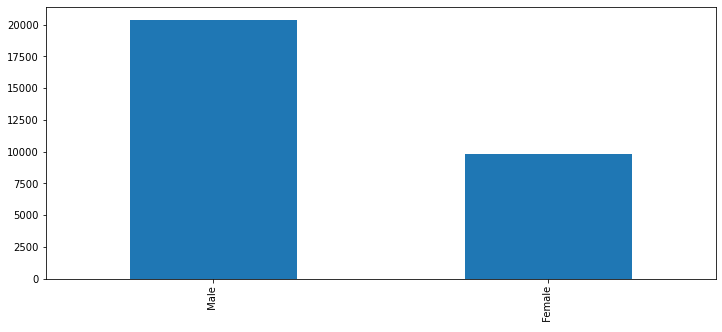

In [12]:
plt.figure(figsize=(12,5))
train.sex.value_counts().plot.bar()

<AxesSubplot:>

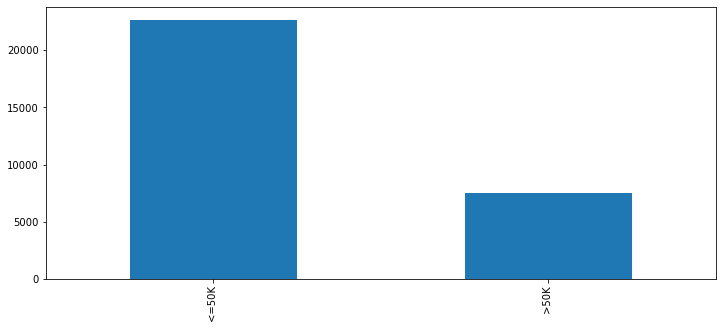

In [13]:
plt.figure(figsize=(12,5))
train.Salary.value_counts().plot.bar()

In [14]:
# Since the Salary column is Y variable here, seperating it from the data set and applying the dummies on rest of the data. 

# For train data set
train1 =train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# For test data set 
test1 = test.iloc[:,0:13]

test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#### Applying PCA 

In [17]:
#Scaling the train dataset
sc=StandardScaler()
sc.fit(train1)
train_norm = sc.transform(train1)
train_norm  

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [18]:
train_norm.shape

(30161, 102)

In [19]:
#Scaling the test dataset
sc.fit(test1)
test_norm = sc.transform(test1)
test_norm

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [20]:
test_norm.shape

(15060, 102)

In [21]:
from sklearn.decomposition import PCA

In [22]:
#### PCA for train dataset
pca=PCA(n_components=102)
train_pca=pca.fit_transform(train_norm)
train_pca

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
        -4.23371403e-16,  2.62345703e-15, -4.02802157e-16],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
         3.02949325e-15,  2.19944556e-15,  1.39481515e-15],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
        -1.94002531e-14, -1.44622143e-14, -8.04192536e-16],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
        -4.76846858e-17,  5.25283002e-18,  1.15846254e-16],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
        -4.79631520e-16, -1.21635811e-17,  3.17922719e-16],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
        -1.32417510e-17,  2.89334116e-16,  2.11794832e-16]])

In [23]:
#### PCA for test data
pca=PCA(n_components=102)
test_pca=pca.fit_transform(test_norm)
test_pca

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         2.60272531e-15, -7.63585220e-16,  3.77609631e-16],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
        -7.05993826e-15,  3.19138832e-15, -6.99397820e-16],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
        -2.04169792e-15, -1.31484936e-15, -1.15175474e-17],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -6.43375475e-17,  2.00493055e-17,  1.21716972e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
         1.78899299e-16,  3.08836722e-16,  1.67408747e-16],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
         5.87842924e-17, -3.52957051e-18,  3.15259707e-18]])

In [24]:
##  Amount of var explained by each PCA
var=pca.explained_variance_ratio_
var

array([4.44918491e-02, 3.04738722e-02, 2.54771248e-02, 2.29476941e-02,
       1.91173483e-02, 1.74365703e-02, 1.69729612e-02, 1.50198819e-02,
       1.41323412e-02, 1.37926681e-02, 1.29955151e-02, 1.27837642e-02,
       1.24579324e-02, 1.21769668e-02, 1.20884124e-02, 1.18816285e-02,
       1.16361847e-02, 1.15637948e-02, 1.14669041e-02, 1.12023341e-02,
       1.11093272e-02, 1.10676871e-02, 1.09034308e-02, 1.08468261e-02,
       1.06705234e-02, 1.06448917e-02, 1.06236196e-02, 1.05932709e-02,
       1.05244424e-02, 1.04833006e-02, 1.03939273e-02, 1.03654553e-02,
       1.03384466e-02, 1.02798662e-02, 1.02443455e-02, 1.02118249e-02,
       1.02086729e-02, 1.01176828e-02, 1.00629447e-02, 1.00180681e-02,
       9.93329938e-03, 9.89826168e-03, 9.88802295e-03, 9.86657309e-03,
       9.84617212e-03, 9.83187564e-03, 9.82515129e-03, 9.81706892e-03,
       9.81098105e-03, 9.79825806e-03, 9.79230707e-03, 9.77958279e-03,
       9.76888157e-03, 9.75932788e-03, 9.75167811e-03, 9.74131072e-03,
      

In [25]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 4.45,  7.5 , 10.05, 12.34, 14.25, 15.99, 17.69, 19.19, 20.6 ,
       21.98, 23.28, 24.56, 25.81, 27.03, 28.24, 29.43, 30.59, 31.75,
       32.9 , 34.02, 35.13, 36.24, 37.33, 38.41, 39.48, 40.54, 41.6 ,
       42.66, 43.71, 44.76, 45.8 , 46.84, 47.87, 48.9 , 49.92, 50.94,
       51.96, 52.97, 53.98, 54.98, 55.97, 56.96, 57.95, 58.94, 59.92,
       60.9 , 61.88, 62.86, 63.84, 64.82, 65.8 , 66.78, 67.76, 68.74,
       69.72, 70.69, 71.66, 72.63, 73.6 , 74.56, 75.52, 76.48, 77.43,
       78.38, 79.33, 80.27, 81.2 , 82.13, 83.05, 83.97, 84.89, 85.8 ,
       86.7 , 87.59, 88.47, 89.34, 90.2 , 91.05, 91.88, 92.69, 93.48,
       94.26, 95.03, 95.74, 96.45, 97.09, 97.7 , 98.28, 98.81, 99.28,
       99.69, 99.94, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96])

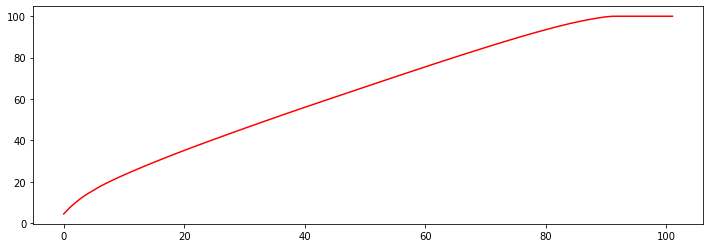

In [26]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [27]:
##Let's select 1st 91 columns for model creation, as looking at the data varience we understand that
##we get 99.36% of the data in 1st 91 columns

In [28]:
finaltrain = pd.concat([pd.DataFrame(train_pca
                                     [:,0:90]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.409813,-0.711475,0.566080,-1.599465,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.680328,0.177364,-0.265304,-0.170305,0.307492,-0.087299,-0.407937,1.072890,-0.389103,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,0.603116,-0.279650,0.035936,0.532717,-0.070438,-0.160400,0.100112,-0.124855,0.253184,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,-1.205160,0.177494,0.668585,0.528450,0.580482,0.156868,-0.442096,0.753165,-0.657852,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,1.329776,-0.312235,0.180269,-1.124998,0.500770,-0.047237,-0.227867,0.993340,-0.939524,<=50K


In [29]:
finaltest = pd.concat([pd.DataFrame(test_pca[:,0:90]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,...,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,...,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,...,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,...,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,...,-0.341200,0.427165,0.069133,-0.864467,0.492786,-0.925634,0.280922,0.994358,-0.493925,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.603437,-1.380653,-1.217944,3.023232,0.463631,0.320846,0.117746,-0.907320,1.101617,0.372391,...,-0.188856,0.102889,0.003352,0.969400,0.325052,1.506765,-0.047672,0.319851,-1.221906,<=50K
15056,-1.670443,-3.020764,0.059822,-0.326201,1.744026,-0.876546,-1.136618,-0.761872,0.720123,-0.079865,...,-0.158983,0.387623,-0.149291,0.919562,0.137806,0.821065,-0.053937,-1.401547,-0.662635,<=50K
15057,2.395832,-1.468597,-0.209425,1.122402,0.364606,-0.944486,0.190120,-1.382649,0.773748,0.171544,...,-0.488672,-0.211695,0.427440,0.216012,0.330597,0.638795,0.215296,-0.532991,-1.089635,<=50K
15058,-1.140395,-1.036781,2.580795,2.251643,-1.495169,-1.684794,-0.913144,2.031935,-0.905050,-0.245674,...,1.018273,2.174690,-0.425788,0.167408,0.560413,2.514837,-0.992345,1.516196,-0.091726,<=50K


In [36]:
# For train dataset
array = finaltrain.values
X = array[0:1500,0:90]
Y = array[0:1500,90]

In [37]:
# For test dataset
x = finaltest.values[0:1500,0:90]
y = finaltest.values[0:1500,90]

In [33]:
#### Let's use Grid search CV to find out best value for params

In [38]:
clf=SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv=GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)
gsv.best_params_ , gsv.best_score_

({'C': 10, 'kernel': 'linear'}, 0.8166666666666667)

In [39]:
#SVM Clasification
clf = SVC(C=10, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))

0.8507
